In [16]:
import sympy
sympy.init_printing()

# Non-degenerate expansion:

Define symbolic variables:

In [17]:
t=sympy.Symbol('t')
k=sympy.Symbol('k')
x=sympy.Symbol('x')
m=sympy.Symbol('m')

Pressure for particles:

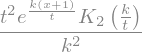

In [18]:
Pk=t**2/k/k*sympy.exp(k*(x+1)/t)*sympy.besselk(2,k/t)
display(Pk)

Pressure for particles and antiparticles together:

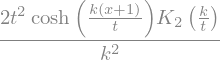

In [29]:
Pka=(2*t**2/k/k*sympy.cosh(k*(x+1)/t)*
     sympy.besselk(2,k/t))
Pka

Show that the pressure for antiparticles is correct:

In [31]:
Pka2=(Pk+t**2/k/k*sympy.exp(k*(-x-1)/t)*
      sympy.besselk(2,k/t))
Pka3=Pka2.subs(sympy.exp(k*(x+1)/t),2*sympy.cosh(k*(x+1)/t)-
               sympy.exp(-k*(x+1)/t))
sympy.simplify(Pka3-Pka)

Number density for particles:

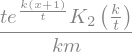

In [32]:
nk=sympy.simplify(sympy.diff(Pk,x))/m
nk

Show that $n_k/P_k = k/t/m$:

In [22]:
sympy.simplify(nk/Pk)

Compute entropy:

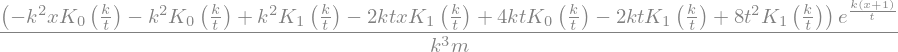

In [23]:
sk=sympy.simplify(sympy.diff(Pk,t))/m
sk

Compare the computed entropy with the expression in the O<sub>2</sub>scl documentation:

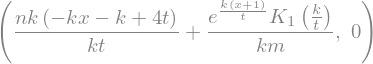

In [24]:
nk_old=nk
nk=sympy.Symbol('nk')
skalt=(nk*(4*t-k*x-k)/k/t+1/k*sympy.exp(k*(x+1)/t)*sympy.besselk(1,k/t)/m)
diff=sympy.simplify(skalt.subs('nk',nk_old)-sk)
nk=nk_old
skalt,diff

Compute terms for energy density:

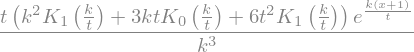

In [25]:
edk=sympy.simplify(-Pk+t*m*sk+(x+1)*m*nk)
edk

Replace K<sub>0</sub> with a combination of K<sub>1</sub> and K<sub>2</sub> and 
define
$$
B_1 \equiv K_1(k/t) \quad ; \quad B_2 \equiv K_2(k/t)
$$

In [26]:
edk2=edk.subs(sympy.besselk(0,k/t),sympy.besselk(2,k/t)-
             2*t/k*sympy.besselk(1,k/t))

Show that this substitution works by computing a numerical result:

In [27]:
[sympy.N(sympy.besselk(0,2.78)),sympy.N(sympy.besselk(2,2.78)-
             2/2.78*sympy.besselk(1,2.78))]

For convenience, replace with B1 and B2:

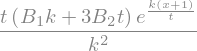

In [28]:
edk3=sympy.simplify(edk2.subs(sympy.besselk(2,k/t),sympy.Symbol('B2')).subs(sympy.besselk(1,k/t),sympy.Symbol('B1')))
edk3

Number density of antiparticles:

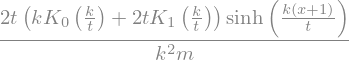

In [38]:
nka=sympy.simplify(sympy.diff(Pka,x))/m
nka

Compute nka/Pka:

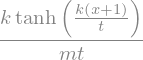

In [39]:
sympy.simplify(nka/Pka)

Entropy of antiparticles:

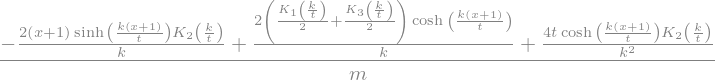

In [40]:
ska=sympy.simplify(sympy.diff(Pka,t))/m
ska

Alternate expression for entropy of antiparticles:

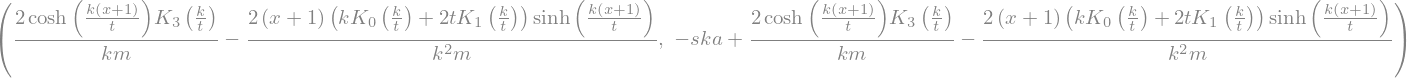

In [41]:
ska_old=ska
ska=sympy.Symbol('ska')
skaalt=(-nka*(1+x)/t+2/k*
        sympy.cosh(k*(x+1)/t)*sympy.besselk(3,k/t)/m)
diff=sympy.simplify(skaalt.subs('ska',ska_old)-ska)
ska=ska_old
skaalt,diff

Energy density for antiparticles:

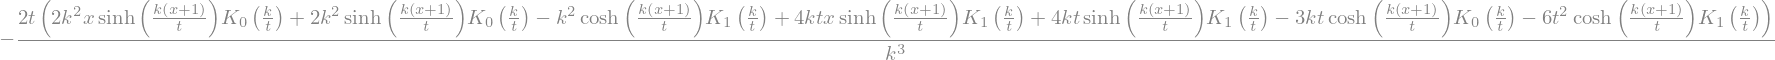

In [21]:
edka=sympy.simplify(-Pka+t*ska*m-(x+1)*m*nka)
edka

Re-express in terms of K2 and K3:

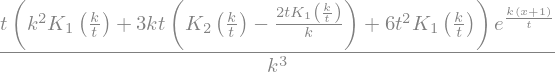

In [22]:
edka2=edka.subs(sympy.besselk(0,k/t),sympy.besselk(2,k/t)-
               2*t/k*sympy.besselk(1,k/t))
edka2=edka2.subs(sympy.besselk(1,k/t),sympy.besselk(3,k/t)-
               4*t/k*sympy.besselk(2,k/t))
edk2

Now express in terms of B2 and B3:

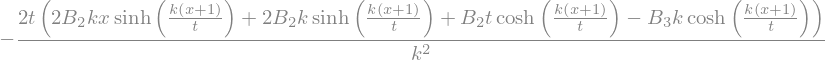

In [23]:
sympy.simplify(edka2.subs(sympy.besselk(2,k/t),sympy.Symbol('B2')).subs(sympy.besselk(3,k/t),sympy.Symbol('B3')))

Now generate the code (this isn't useful yet):

In [24]:
Pk2=sympy.simplify((Pk*sympy.exp(-k/t)).subs(sympy.besselk(2,k/t),'K2exp'))
print('prterm='+sympy.ccode(Pk2))
print('nterm=prterm*k/t')
t1=(skalt.subs('nk',0)*sympy.exp(-k/t)).subs(sympy.besselk(1,k/t),'K1exp')
sk2=sympy.simplify(t1)+skalt.subs(sympy.besselk(1,k/t),0)
print('enterm='+sympy.ccode(sk2))
print('edterm='+sympy.ccode(sympy.simplify(edk3*sympy.exp(-k/t)).subs('B1','K1exp').subs('B2','K2exp')))

prterm=K2exp*pow(t, 2)*exp(k*x/t)/pow(k, 2)
nterm=prterm*k/t
enterm=K1exp*exp(k*x/t)/(k*m) + nk*(-k*x - k + 4*t)/(k*t)
edterm=t*(K1exp*k + 3*K2exp*t)*exp(k*x/t)/pow(k, 2)


## Demonstration of nondegenerate expansion

Electrons at and T=0.1 MeV:

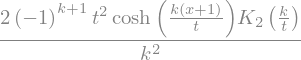

In [22]:
Pka

In [23]:
arr=[t**2/k**2,sympy.exp(k*(x+1)/t),sympy.besselk(2,k/t),t**2/k**2,sympy.cosh(k*(x+1)/t),sympy.besselk(2,k/t)]

In [24]:
tval=0.1/0.511

In [25]:
Tval=0.1/197.33

In [26]:
mval=0.511/197.33

In [27]:
muval=8.0e-12

In [28]:
psival=(muval-mval)/Tval

In [29]:
xval=tval*psival

In [30]:
arr[1].subs('k',1).subs('t',tval).subs('x',xval).subs('m',mval).subs('x',xval)

In [31]:
[sympy.N(arr[i].subs('k',1).subs('t',tval).subs('x',xval).subs('m',mval)) for i in range(0,6)]

In [32]:
[sympy.N(arr[i].subs('k',200).subs('t',tval).subs('x',xval).subs('m',mval)) for i in range(0,6)]

In [33]:
Tval=20.0/197.33

In [34]:
tval=20.0/0.511

In [35]:
psival=(muval-mval)/Tval

In [36]:
xval=tval*psival

In [37]:
[sympy.N(arr[i].subs('k',1).subs('t',tval).subs('x',xval).subs('m',mval)) for i in range(0,6)]

In [38]:
[sympy.N(arr[i].subs('k',200).subs('t',tval).subs('x',xval).subs('m',mval)) for i in range(0,6)]

# Degenerate expansion

In [37]:
z=sympy.Symbol('z',positive=True)
x=sympy.Symbol('x',positive=True)
pi=sympy.Symbol('pi',positive=True)
t=sympy.Symbol('t')
fz=(z*(2+z))**(sympy.Rational(3,2))/3

Show the first few terms:

1:


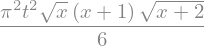

2:


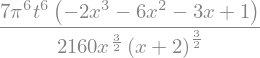

3:


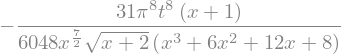

4:


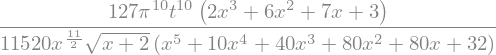

In [38]:
fz1=sympy.diff(fz,z)*pi**2*t**2/6
print('1:')
display(sympy.simplify(fz1.subs(z,x)))

fzt=fz1
for i in range(0,3):
    fzt=sympy.diff(fzt,z)
    fzt=sympy.diff(fzt,z)
    n=sympy.Rational(i+2,1)
    term=(fzt.subs(z,x)*pi**(2*n)*t**(2*n)*sympy.bernoulli(2*n)*2*
          (2**(2*n-1)-1)/sympy.factorial(2*n))
    term=sympy.simplify(term)
    print(str(i+2)+':')
    display(term)

In [39]:
prefix='for (j=0;j<9;j++)'